In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/Covid_Data_Clean.csv')

# Distribucija ishoda prema starosti (Istraživačko pitanje br. 1)

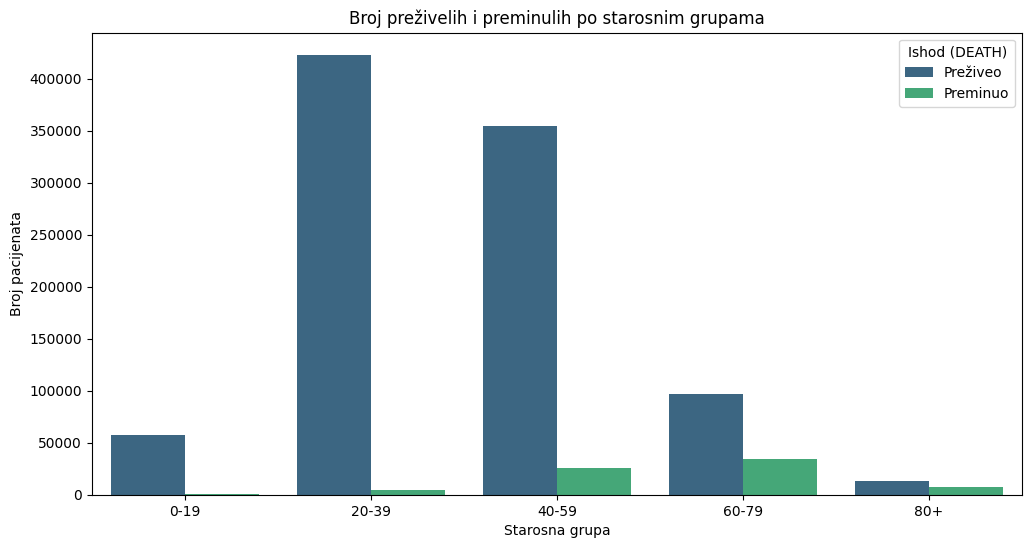

In [7]:
# Definisanje redosleda grupa
redosled_grupa = ['0-19', '20-39', '40-59', '60-79', '80+']

# Pretvaranje kolone u 'category' tip sa definisanim redosledom
df['AGE_GROUP'] = pd.Categorical(df['AGE_GROUP'], categories=redosled_grupa, ordered=True)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AGE_GROUP', hue='DEATH', palette='viridis')
plt.title('Broj preživelih i preminulih po starosnim grupama')
plt.xlabel('Starosna grupa')
plt.ylabel('Broj pacijenata')
plt.legend(title='Ishod (DEATH)', labels=['Preživeo', 'Preminuo'])
plt.savefig('../images/distribucija_starost_ishod.png')
plt.show()